# Import Packages     

In [56]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt


from nba_api.stats.endpoints import playercareerstats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns 


from nba_api.stats.static import players
from plotly.offline import iplot
#dfT=dfT.drop(columns=['PLAYER_ID','SEASON_ID','TEAM_ID','TEAM_ABBREVIATION'])


pd.options.display.max_columns = None
#py.offline.init_notebook_mode(connected=True)


In [24]:
df=playercareerstats.PlayerCareerStats(player_id=2544).get_data_frames()[0]
time.sleep(2)
df=df.loc[df['SEASON_ID']=='2018-19']
data= players.get_active_players()


203500


  Acquiring Required Data 

In [3]:
print(len(data))

519


Pulling 2018-2019 Season Data of All players

In [26]:
#starting Df
df=playercareerstats.PlayerCareerStats(player_id=2544).get_data_frames()[0]
time.sleep(2)
dfT=df.loc[df['SEASON_ID']=='2018-19']

for i in range(1,len(data)):
    time.sleep(.600)
    df=playercareerstats.PlayerCareerStats(player_id=data[i]['id']).get_data_frames()[0]
  
    df=df.loc[df['SEASON_ID']=='2018-19']
    dfT=pd.concat([df, dfT], ignore_index=True)
    

In [44]:
#saved to a csv whgen api timed out
data=dfT.drop(columns=['PLAYER_ID','SEASON_ID','LEAGUE_ID','TEAM_ID','TEAM_ABBREVIATION'])

dfT.to_csv(r"C:\Users\adsha\Documents\nba-analysis\data.csv", index = False)


In [45]:
data

,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,22.0,33,12,516.0,112,193,0.580,0,0,0.000,57,66,0.864,54,108,162,25,4,27,33,73,281
1,22.0,26,25,524.0,100,186,0.538,0,0,0.000,44,60,0.733,61,139,200,38,10,24,37,64,244
2,22.0,59,37,1039.0,212,379,0.559,0,0,0.000,101,126,0.802,115,247,362,63,14,51,70,137,525
3,22.0,59,25,1082.0,183,331,0.553,0,0,0.000,93,132,0.705,108,212,320,53,13,22,61,113,459
4,26.0,49,47,1243.0,190,345,0.551,6,22,0.273,111,141,0.787,110,223,333,102,38,41,62,164,497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,21.0,80,80,2096.0,335,568,0.590,6,45,0.133,197,278,0.709,191,481,672,110,43,120,103,184,873
516,23.0,38,2,416.0,67,178,0.376,32,99,0.323,45,60,0.750,3,20,23,25,6,6,33,47,211
517,33.0,81,81,2687.0,684,1319,0.519,10,42,0.238,349,412,0.847,251,493,744,194,43,107,144,179,1727
518,21.0,82,28,1913.0,280,486,0.576,3,15,0.200,166,226,0.735,165,432,597,184,71,65,121,203,729


In [52]:
print(type(data))
#data.apply(pd.to_numeric, errors='ignore')
data = data.astype(float)

<class 'pandas.core.frame.DataFrame'>


0       281
1       244
2       525
3       459
4       497
       ... 
515     873
516     211
517    1727
518     729
519    1505
Name: PTS, Length: 520, dtype: object

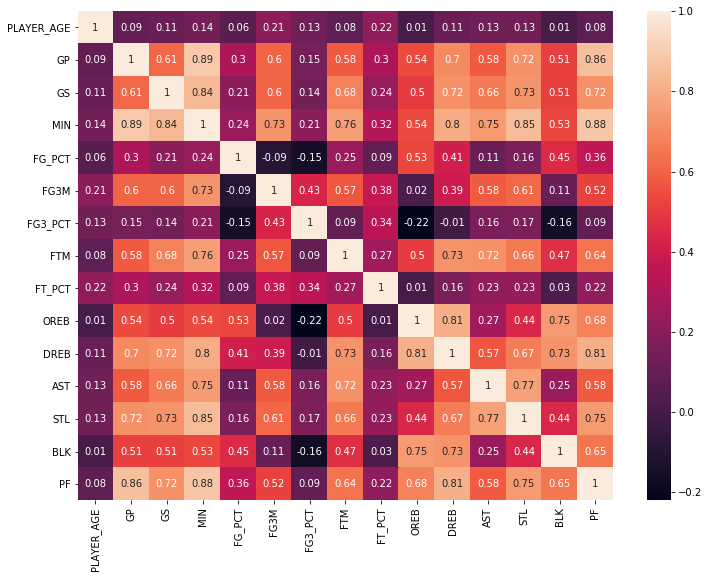

In [68]:
correlation_matrix = data.corr().round(2)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

#Select features to be used on model
columns = np.full((correlation_matrix.shape[0],), True, dtype=bool)
for i in range(correlation_matrix.shape[0]):
    for j in range(i+1, correlation_matrix.shape[0]):
        if correlation_matrix.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
selected_columns.shape

# data = data[selected_columns]
# data


In [73]:

X_train, X_test, y_train, y_test = train_test_split(data, dfT['PTS'], test_size=0.2, random_state=0)

In [74]:

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
422,305,342.258274
107,1209,1276.761721
253,551,780.703482
235,534,483.821639
311,79,95.768561
...,...,...
239,322,397.474953
468,1700,1636.981931
49,61,29.986752
100,198,174.137472


In [83]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Model Accuracy:',regressor.score(X_train, y_train))

Mean Absolute Error: 67.57841065663386
Mean Squared Error: 8226.306123212107
Root Mean Squared Error: 90.6989863405987
Model Accuracy: 0.9683556506013027
